# You have 2 weeks to analyze the data and propose a ML model to predict whether some employee would leave the company in the next 2 years. 

To do so, you need to produce the following notebooks:
EDA to understand the dataset
ML modeling to find the best model through ML iteration and using pipelines
prediction notebook to load and use the model with new data
All the work should be done in a git repository




Vous avez 2 semaines pour analyser les données et proposer un modèle ML pour prédire si un employé quittera l'entreprise dans les 2 prochaines années.
Pour ce faire, vous devez produire les notebooks suivants:¶
EDA pour comprendre le jeu de données Modélisation ML pour trouver le meilleur modèle par itération ML et en utilisant des pipelines Notebook de prédiction pour charger et utiliser le modèle avec de nouvelles données Tout le travail doit être fait dans un dépôt git.



# NOTEBOOK EDA

In [63]:
# Import Librairie
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing 
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [64]:
df = pd.read_csv("data/Employee.csv")

In [65]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [66]:
# Affiche les 5 lignes 
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [67]:
# taille de nos données (4653 Lignes, 9 Colonnes)
df.shape

(4653, 9)

In [68]:
# imprime des infos sur le datafrme comme le type d'index, les colonnes, les valeurs non-null et la mémoire
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [69]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [70]:
# traitement des Valeur manquante, 0 valeur manquante 
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [71]:
df.isnull().values.any()

False

In [72]:
# nous compte le type de valeur (float, object)
df.dtypes.value_counts()

int64     5
object    4
dtype: int64

# DATA VISUALISATION

# Compte le nombre d'employées par "Diplôme"

In [73]:
df["Education"].value_counts()

Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64

C:\Users\simplon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


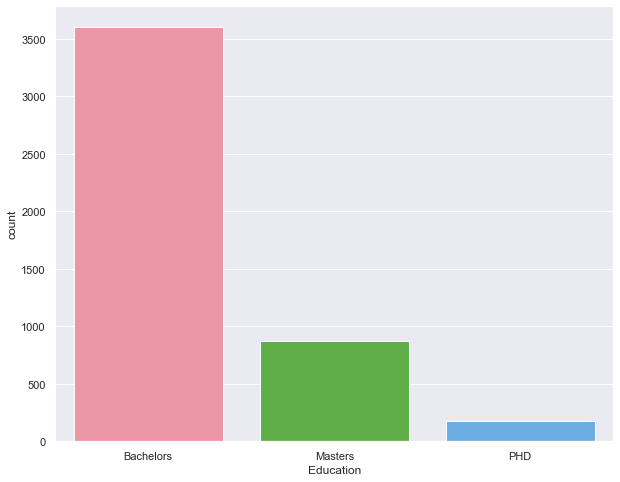

In [74]:
# countplot
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(10,8))
sns.countplot(df['Education'], label='Count') 
plt.show()

# Compte le nombre d'employées qui ont "Rejoint l'entreprise"

In [75]:
df["JoiningYear"].value_counts()

2017    1108
2015     781
2014     699
2013     669
2016     525
2012     504
2018     367
Name: JoiningYear, dtype: int64

C:\Users\simplon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


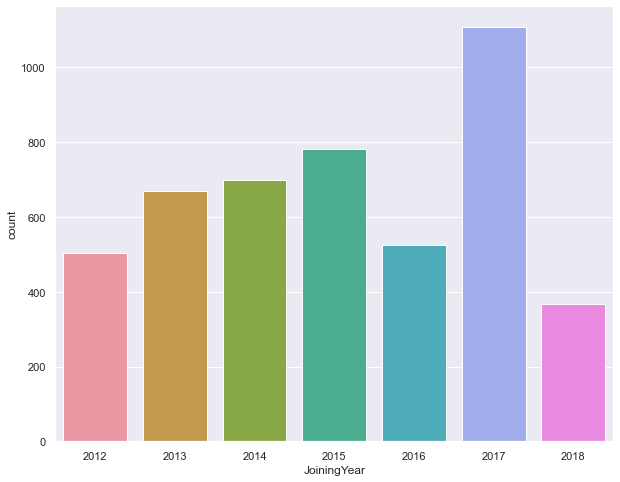

In [76]:
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(10,8))
sns.countplot(df['JoiningYear'], label='Count') 
plt.show()

# Compte le nombre d'employées par "Ville"

In [77]:
df["City"].value_counts()

Bangalore    2228
Pune         1268
New Delhi    1157
Name: City, dtype: int64

C:\Users\simplon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


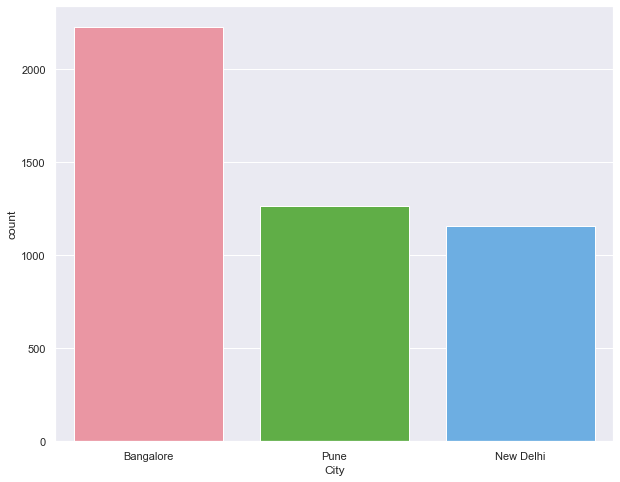

In [78]:
# countplot
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(10,8))
sns.countplot(df['City'], label='Count') 
plt.show()

# Compte le nombre d'employées par "Niveaux de salaires"

In [79]:
df["PaymentTier"].value_counts()

3    3492
2     918
1     243
Name: PaymentTier, dtype: int64

C:\Users\simplon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


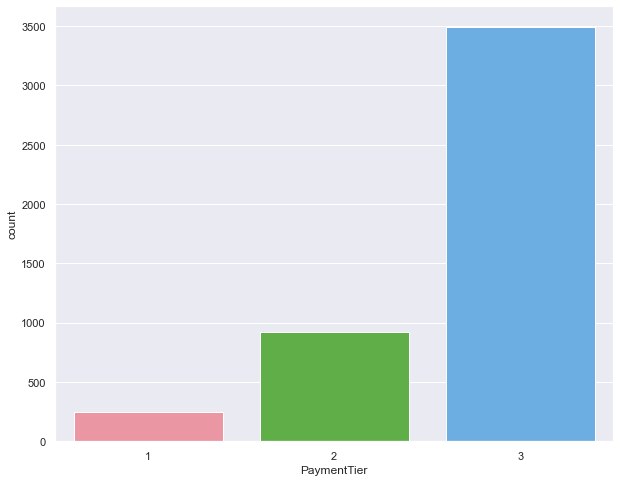

In [80]:
# countplot
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(10,8))
sns.countplot(df['PaymentTier'], label='Count') 
plt.show()

# Compte le nombre d'employées par "Age"

In [81]:
df["Age"].value_counts()

26    645
28    630
27    625
25    418
24    385
29    230
30    220
37    141
36    139
34    136
38    136
40    134
32    132
39    131
31    125
33    124
35    123
41     82
22     49
23     48
Name: Age, dtype: int64

C:\Users\simplon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


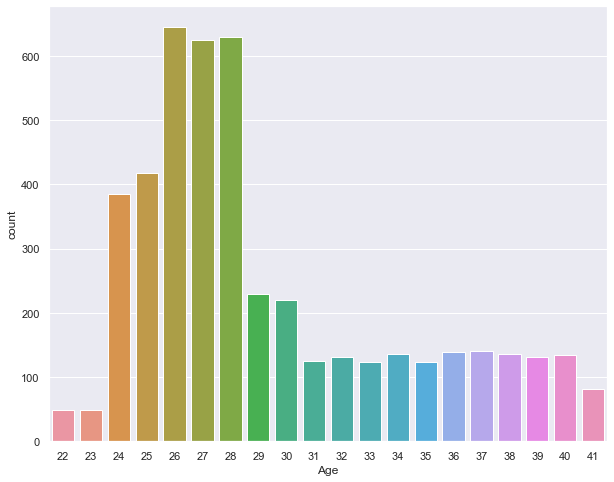

In [82]:
# countplot
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(10,8))
sns.countplot(df['Age'], label='Count') 
plt.show()

# Compte le nombre d'employées de "Femmes et d'Hommes"

In [83]:
df["Gender"].value_counts()

Male      2778
Female    1875
Name: Gender, dtype: int64

C:\Users\simplon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


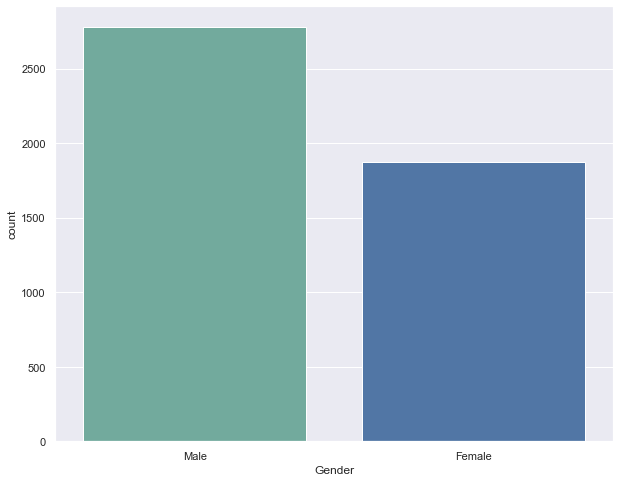

In [84]:
# # countplot
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(10,8))
sns.countplot(df['Gender'], label='Count') 
plt.show()

# Compte le nombre d'employées "Mis au placard"

In [85]:
df["EverBenched"].value_counts()

No     4175
Yes     478
Name: EverBenched, dtype: int64

C:\Users\simplon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


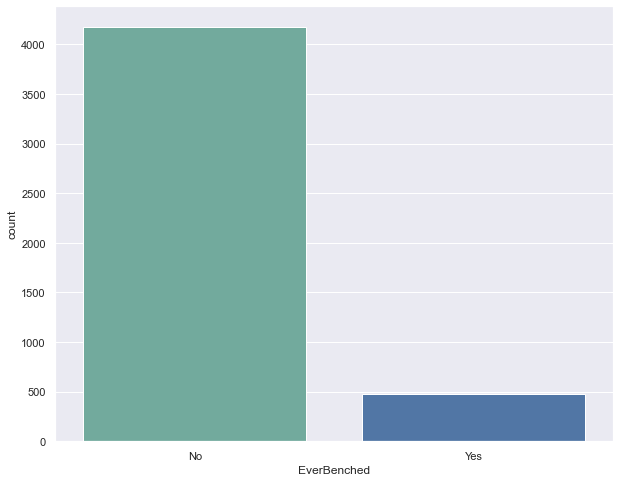

In [86]:
# countplot
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(10,8))
sns.countplot(df['EverBenched'], label='Count') 
plt.show()

# Compte le nombre d'employées par "Expérience dans le domaine"

In [87]:
df["ExperienceInCurrentDomain"].value_counts()

2    1087
4     931
5     919
3     786
1     558
0     355
7       9
6       8
Name: ExperienceInCurrentDomain, dtype: int64

C:\Users\simplon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


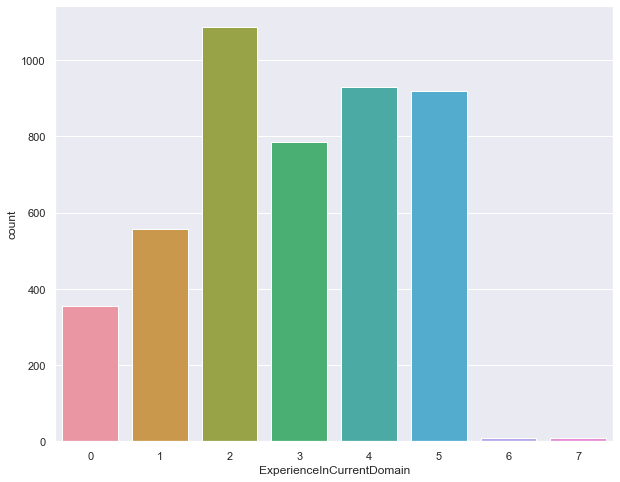

In [88]:
# countplot
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(10,8))
sns.countplot(df['ExperienceInCurrentDomain'], label='Count') 
plt.show()

# CE GRAPHE MONTRE QUE LE DATASET EST DESEQUILIBRE

In [89]:
# compte le nombre de 0 et 1 dans la target
df['LeaveOrNot'].value_counts()

0    3053
1    1600
Name: LeaveOrNot, dtype: int64

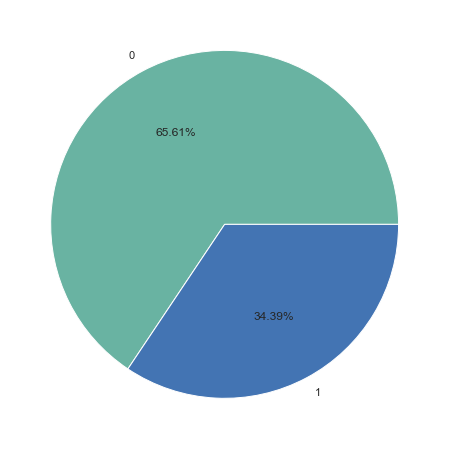

In [90]:
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

df_value = df['LeaveOrNot'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(df_value,autopct='%1.2f%%',labels=df_value.index)
plt.show()

C:\Users\simplon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


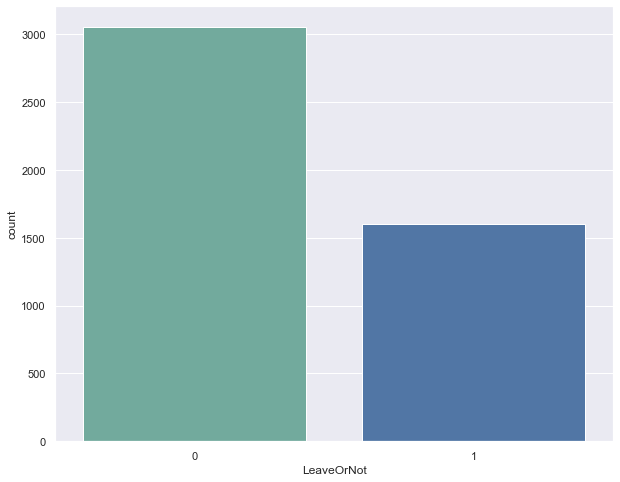

In [91]:
# countplot
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(10,8))
sns.countplot(df['LeaveOrNot'], label='Count') 
plt.show()

In [92]:
# df.drop_duplicate()

# Analyse de Fond

In [93]:
# Supprime tout les NaN ('any'supprime la ligne/colonne si TOUTES les valeurs sont NULL )
df_supp_NaN = df.dropna(how = 'any') 
df_supp_NaN

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


# DATA VISUALISATION 

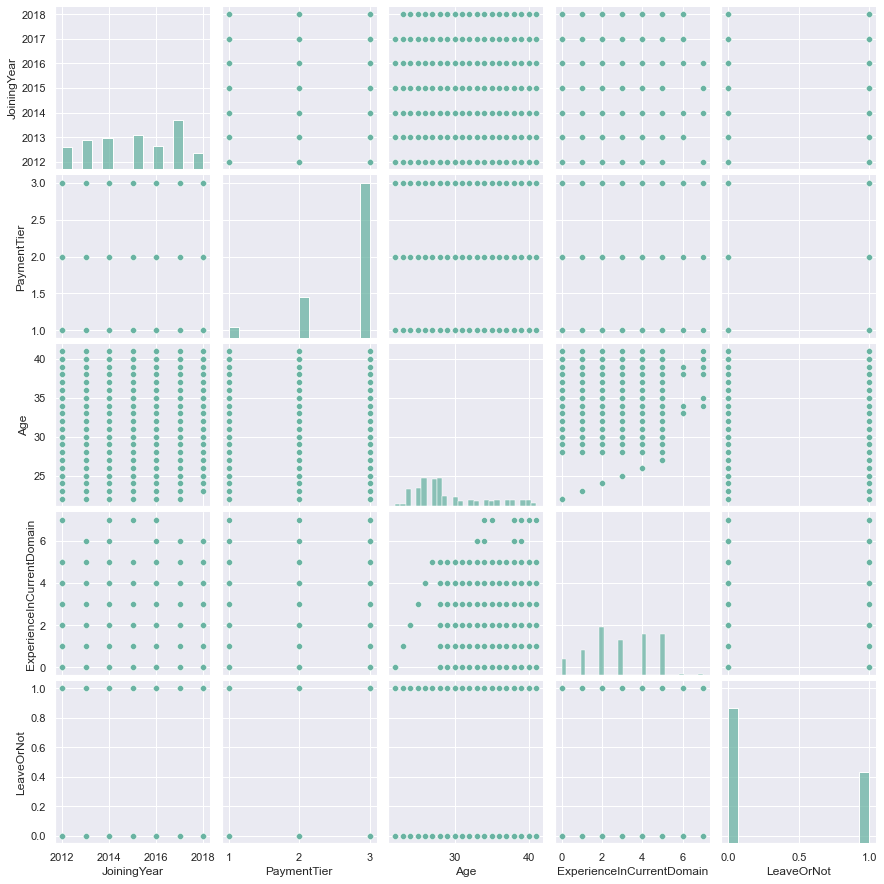

In [94]:
# un graphe qui permet d'avoir une visualisation des données 
sns.pairplot(df)

# VISUALISATION COMPARAISON- FEATURES ET TARGET "LeaveOrNot"

<AxesSubplot:xlabel='Education', ylabel='LeaveOrNot'>

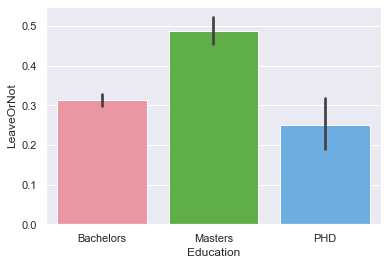

In [95]:
# Create an array with the colors you want to use
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

sns.barplot(x=df["Education"] , y=df["LeaveOrNot"])

<AxesSubplot:xlabel='JoiningYear', ylabel='LeaveOrNot'>

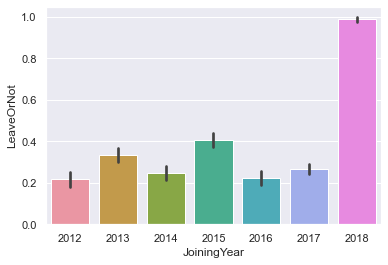

In [96]:
# Create an array with the colors you want to use
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

sns.barplot(x=df["JoiningYear"] , y=df["LeaveOrNot"])

<AxesSubplot:xlabel='City', ylabel='LeaveOrNot'>

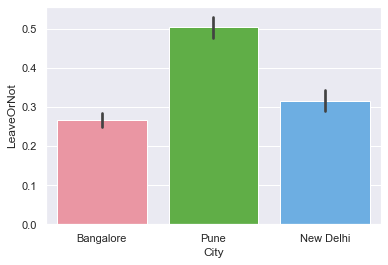

In [97]:
# Create an array with the colors you want to use
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

sns.barplot(x=df["City"] , y=df["LeaveOrNot"])

<AxesSubplot:xlabel='PaymentTier', ylabel='LeaveOrNot'>

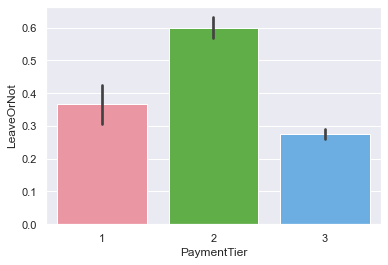

In [98]:
# Create an array with the colors you want to use
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

sns.barplot(x=df["PaymentTier"] , y=df["LeaveOrNot"])

<AxesSubplot:xlabel='Age', ylabel='LeaveOrNot'>

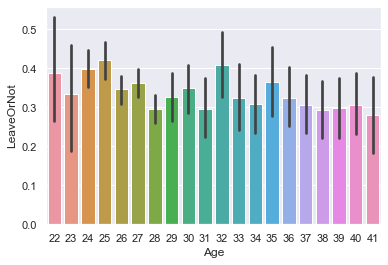

In [99]:
# Create an array with the colors you want to use
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

sns.barplot(x=df["Age"] , y=df["LeaveOrNot"])

<AxesSubplot:xlabel='Gender', ylabel='LeaveOrNot'>

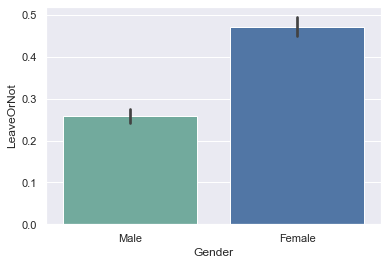

In [100]:
# Create an array with the colors you want to use
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

sns.barplot(x=df["Gender"] , y=df["LeaveOrNot"])

<AxesSubplot:xlabel='EverBenched', ylabel='LeaveOrNot'>

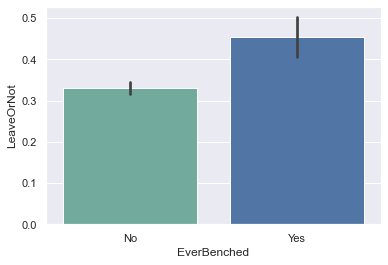

In [101]:
# Create an array with the colors you want to use
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

sns.barplot(x=df["EverBenched"] , y=df["LeaveOrNot"])

<AxesSubplot:xlabel='ExperienceInCurrentDomain', ylabel='LeaveOrNot'>

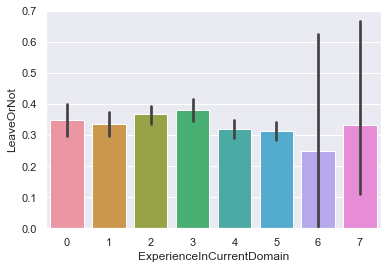

In [102]:
# Create an array with the colors you want to use
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

sns.barplot(x=df["ExperienceInCurrentDomain"] , y=df["LeaveOrNot"])

# Feature Correlation

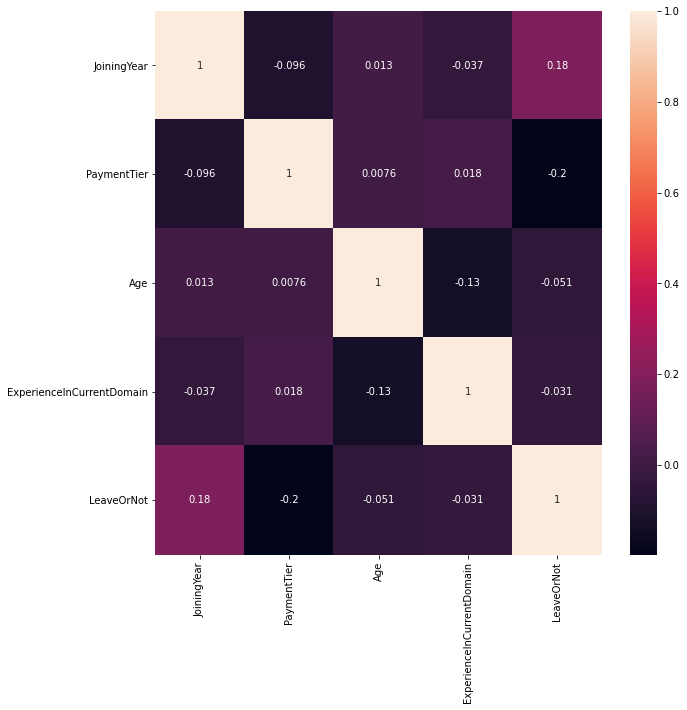

In [41]:
# permet de savoir s'il y a des correlation entre les valeurs
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()


# AUTRE VERSION DE LA HEATMAP

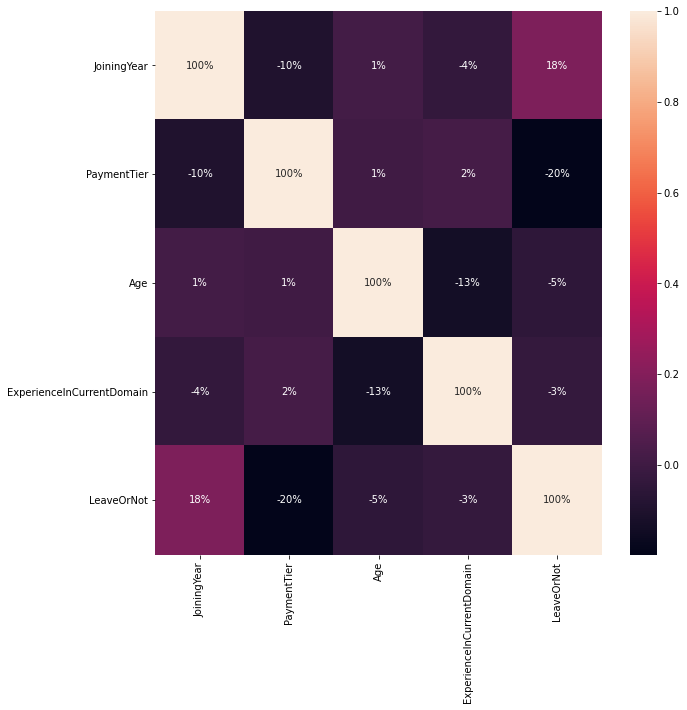

In [42]:
# permet de savoir s'il y a des correlation entre les valeurs
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True ,fmt='.0%')
plt.show()

# OUTLIERS

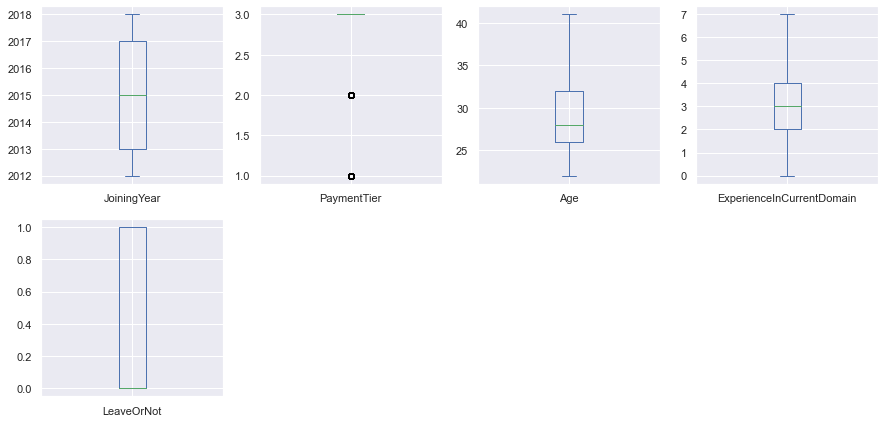

In [43]:
# aucun outliers
sns.set(style="darkgrid")
df.plot(kind='box', subplots=True, layout=(4, 4), figsize = (15, 15));

In [44]:
# Ce visuel est plus détaillé et lisible 
plt.figure(figsize=(10,10))
df.corr().style.background_gradient(cmap='coolwarm')
plt.show()

<Figure size 720x720 with 0 Axes>

C:\Users\simplon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


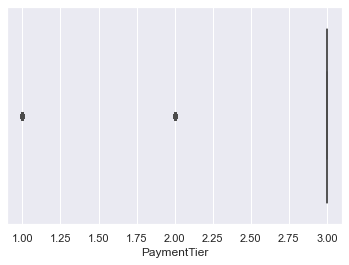

In [45]:
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(6,4)})

sns.boxplot(df.PaymentTier)

plt.show()


# HISTOGRAM

In [46]:
def histogram(df):
    return df.hist(figsize =(15,8))

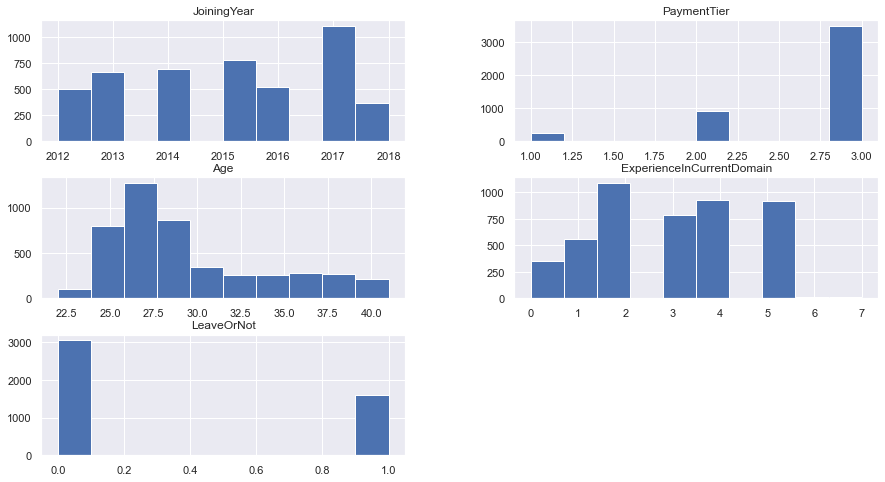

In [47]:
histogram(df);

# HISTOGRAM 2

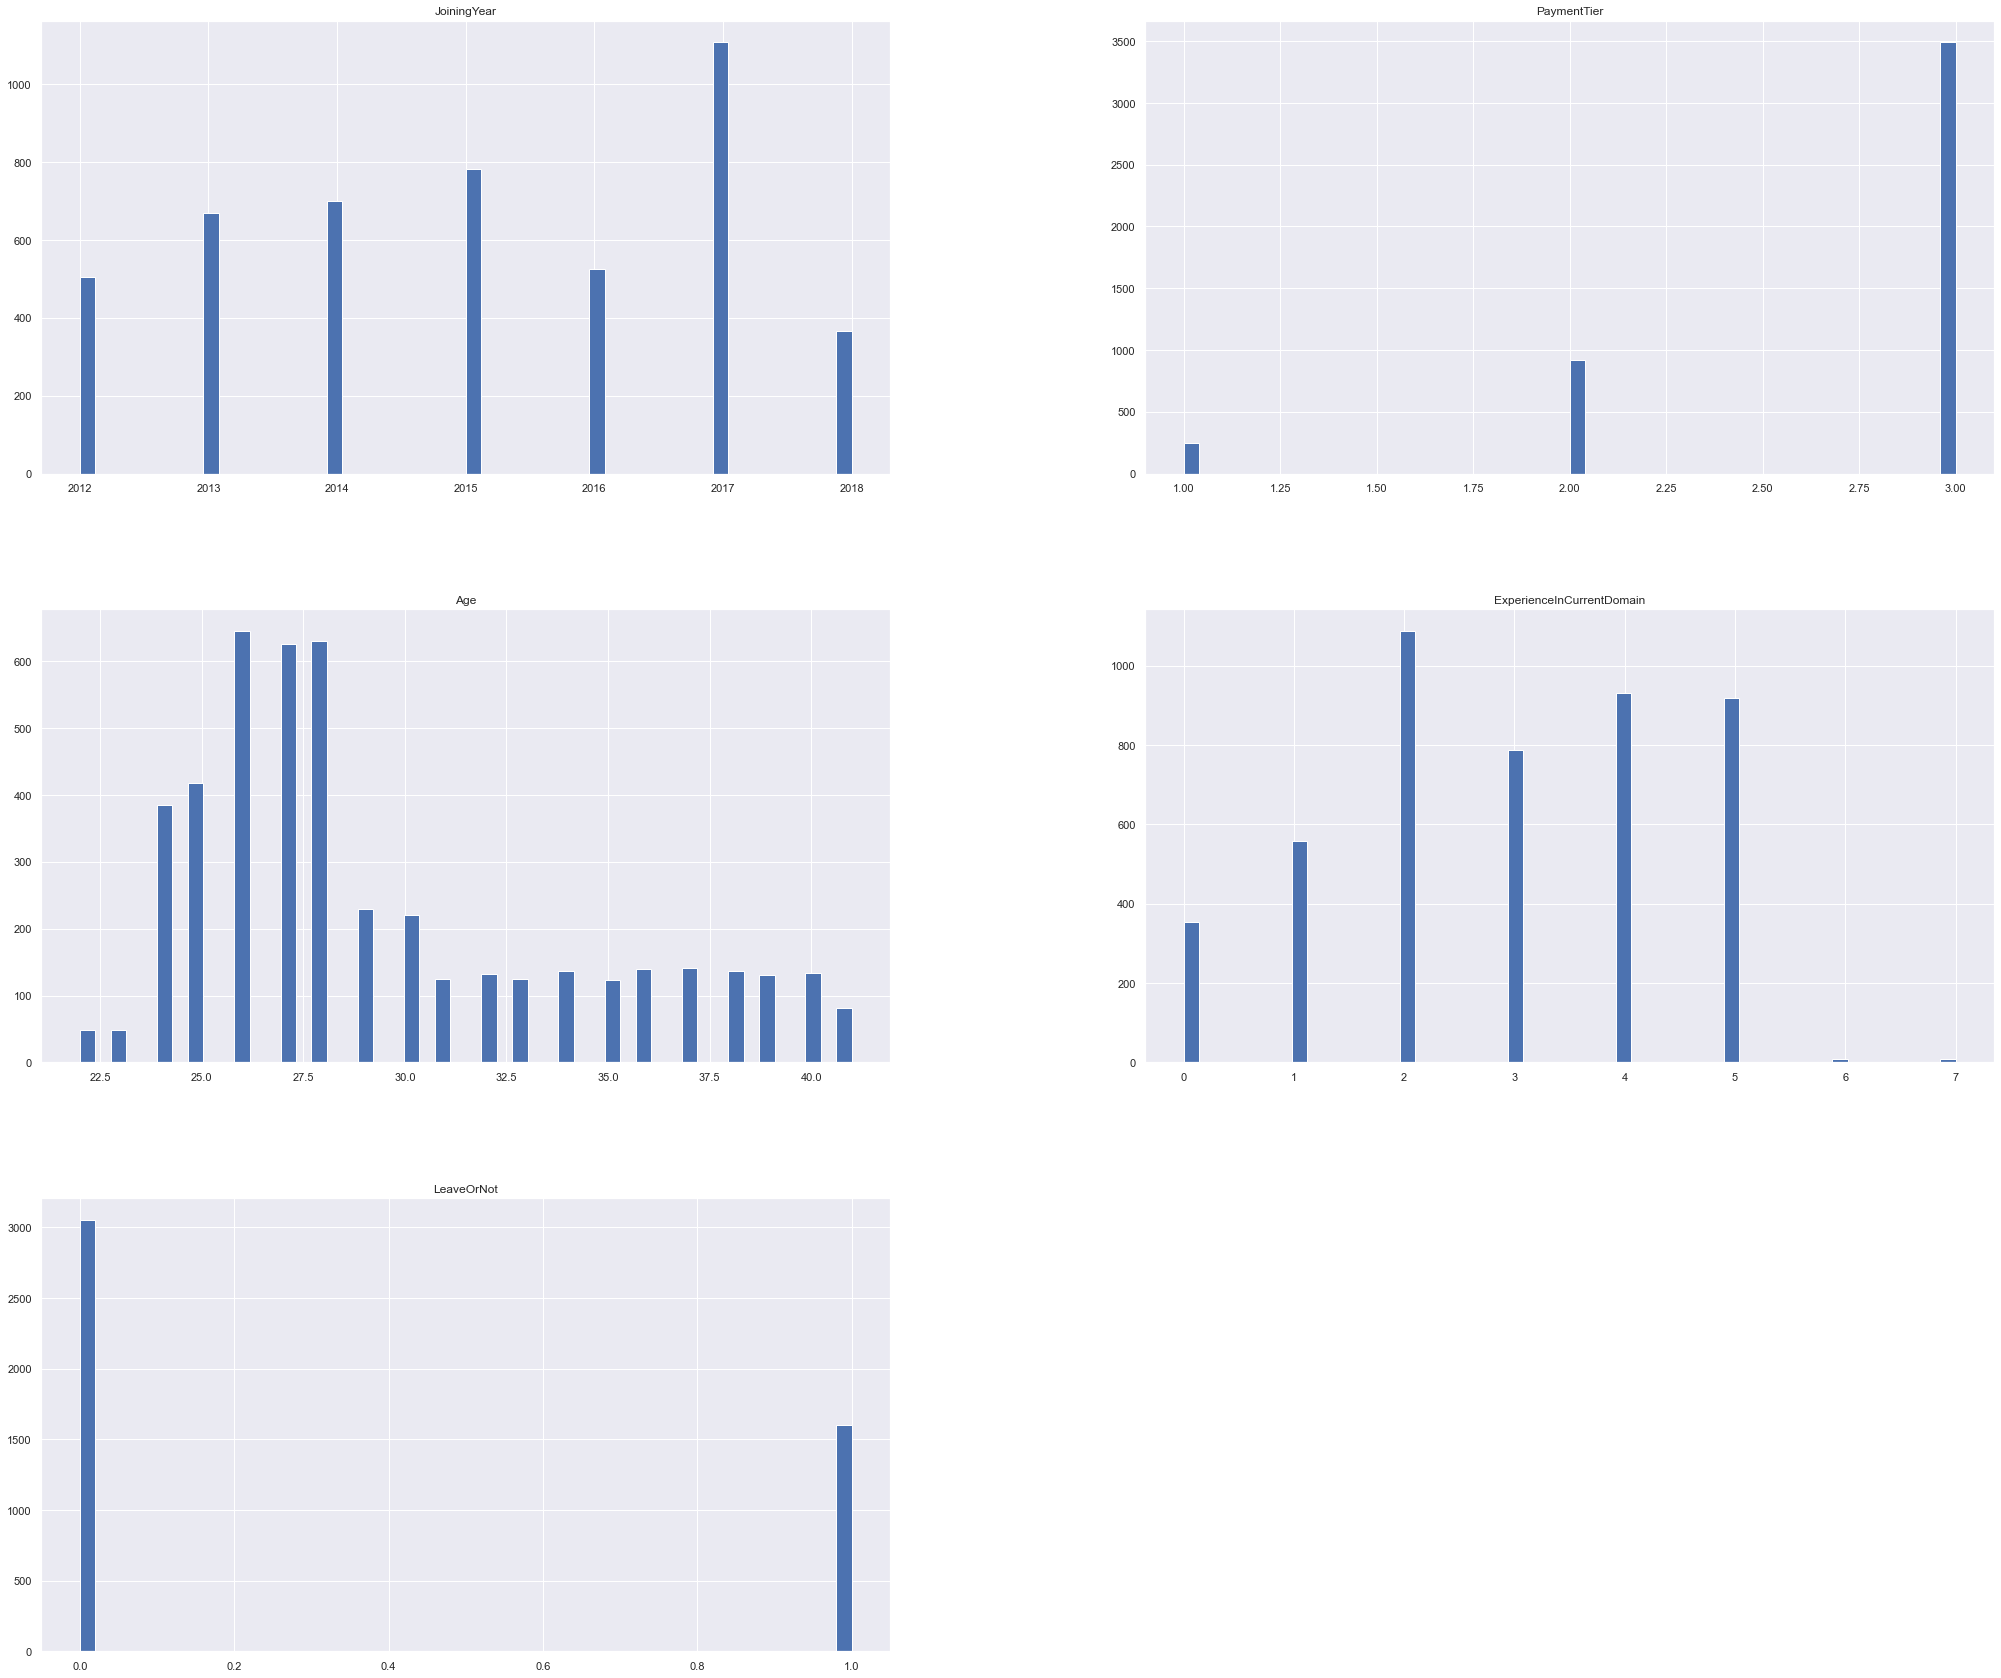

In [48]:
df.hist(figsize = (35,30), bins = 50)
plt.show()

# Encoding

In [49]:
# categ = ['Education','City','Gender','EverBenched']
# le = LabelEncoder()
# df[categ] = df[categ].apply(le.fit_transform)

In [50]:
# X=df.drop(labels=['LeaveOrNot'], axis=1)
# y=df['LeaveOrNot']

In [51]:
# le = LabelEncoder()
# ohe = OneHotEncoder()
# ohe = OneHotEncoder(handle_unknown='ignore')
# categ = ['Education','City','Gender','EverBenched']
# df[categ] = df[categ].apply(ohe.fit_transform)



In [52]:
# X=df.drop(labels=['LeaveOrNot'], axis=1)
# y=df['LeaveOrNot']

In [53]:
# OHE = OneHotEncoder().fit(X)
# OHE = OneHotEncoder(handle_unknown='ignore')
# OHE = ['Education','City','Gender','EverBenched']
# df[categ] = df[categ].apply(OHE.fit_transform)
# encoder.fit_transform(X)
# df

In [54]:
# ce tranformer compresse la matrice par defaut
# OHE = OneHotEncoder(handle_unknown='ignore')
# categ = ['Education','City','Gender','EverBenched']
# df[categ] = df[categ].apply(OHE.fit_transform)
# df
# encoder.fit_transform(X)

In [55]:
# encoder = OneHotEncoder(handle_unknown='ignore')
# categ = ['Education','City','Gender','EverBenched']
# df[categ] = df[categ].apply(encoder.fit_transform)

In [56]:
# X=df.drop(labels=['LeaveOrNot'], axis=1)
# y=df['LeaveOrNot']

In [57]:
# encoder = OneHotEncoder().fit(X)
# encoder

In [58]:
# ce tranformer compresse la matrice par defaut
# encoder = OneHotEncoder()
# encoder.fit_transform(X)

In [59]:
# df

In [60]:
lBE = LabelEncoder()
categ = ['Education','City','Gender','EverBenched']
df[categ] = df[categ].apply(lBE.fit_transform)
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1
4651,0,2012,0,3,30,1,1,2,0


In [61]:
# Exporter le fichier csv pour pouvoir le lire 
df.to_csv(r'datadf.csv')